## Connect to the Northwind dataset using SQL

In [2]:
import psycopg2 #Load Module into current namespace

#define connection string specifing the server, the database, the user and the password
constr =  "host='dsi.c20gkj5cvu3l.us-east-1.rds.amazonaws.com' dbname='northwind' user='dsi_student' password = 'gastudents'"

#Use the connection string to establish a connection to the server. The return type is of type SQLConnection
conn = psycopg2.connect(constr)

#Create a Cursor Instance using the connection - cursor points to a location so that you can execute a query.
#Use one cursor for one connection to a database. If I need to connect to another database, then I create a new cursor.
cursor = conn.cursor()

#Use the cursor to execute a query
#In cursor, there's an attribute which stores the result of the query.
cursor.execute('SELECT * FROM ORDERS')

#Fetch the results of the query if it exists
#Fetch all does a while loop of fetch while data exists. We could also add it to the .execute code above.
northwind = cursor.fetchall()

print northwind


[(10248, 'VINET', 5, datetime.date(1996, 7, 4), datetime.date(1996, 8, 1), datetime.date(1996, 7, 16), 3, 32.38, 'Vins et alcools Chevalier', "59 rue de l'Abbaye", 'Reims', None, '51100', 'France'), (10249, 'TOMSP', 6, datetime.date(1996, 7, 5), datetime.date(1996, 8, 16), datetime.date(1996, 7, 10), 1, 11.61, 'Toms Spezialit\xc3\xa4ten', 'Luisenstr. 48', 'M\xc3\xbcnster', None, '44087', 'Germany'), (10250, 'HANAR', 4, datetime.date(1996, 7, 8), datetime.date(1996, 8, 5), datetime.date(1996, 7, 12), 2, 65.83, 'Hanari Carnes', 'Rua do Pa\xc3\xa7o, 67', 'Rio de Janeiro', 'RJ', '05454-876', 'Brazil'), (10251, 'VICTE', 3, datetime.date(1996, 7, 8), datetime.date(1996, 8, 5), datetime.date(1996, 7, 15), 1, 41.34, 'Victuailles en stock', '2, rue du Commerce', 'Lyon', None, '69004', 'France'), (10252, 'SUPRD', 4, datetime.date(1996, 7, 9), datetime.date(1996, 8, 6), datetime.date(1996, 7, 11), 2, 51.3, 'Supr\xc3\xaames d\xc3\xa9lices', 'Boulevard Tirou, 255', 'Charleroi', None, 'B-6000', 'Bel

## Create a pandas df that is the combination of the orders and order_details tables
Each row of your df represents a unique order / product pair.  You could either bring in the tables separately, and join in pandas, or join in SQL, and bring in one table.  Ideally you should try both ways to practice!

In [3]:
cursor2 = conn.cursor()

#Use the cursor to execute a query
#In cursor, there's an attribute which stores the result of the query.
cursor2.execute('SELECT * FROM ORDER_DETAILS')

#Fetch the results of the query if it exists
#Fetch all does a while loop of fetch while data exists. We could also add it to the .execute code above.
northwind2 = cursor2.fetchall()

print northwind2

[(10248, 11, 14.0, 12, 0.0), (10248, 42, 9.8, 10, 0.0), (10248, 72, 34.8, 5, 0.0), (10249, 14, 18.6, 9, 0.0), (10249, 51, 42.4, 40, 0.0), (10250, 41, 7.7, 10, 0.0), (10250, 51, 42.4, 35, 0.15), (10250, 65, 16.8, 15, 0.15), (10251, 22, 16.8, 6, 0.05), (10251, 57, 15.6, 15, 0.05), (10251, 65, 16.8, 20, 0.0), (10252, 20, 64.8, 40, 0.05), (10252, 33, 2.0, 25, 0.05), (10252, 60, 27.2, 40, 0.0), (10253, 31, 10.0, 20, 0.0), (10253, 39, 14.4, 42, 0.0), (10253, 49, 16.0, 40, 0.0), (10254, 24, 3.6, 15, 0.15), (10254, 55, 19.2, 21, 0.15), (10254, 74, 8.0, 21, 0.0), (10255, 2, 15.2, 20, 0.0), (10255, 16, 13.9, 35, 0.0), (10255, 36, 15.2, 25, 0.0), (10255, 59, 44.0, 30, 0.0), (10256, 53, 26.2, 15, 0.0), (10256, 77, 10.4, 12, 0.0), (10257, 27, 35.1, 25, 0.0), (10257, 39, 14.4, 6, 0.0), (10257, 77, 10.4, 15, 0.0), (10258, 2, 15.2, 50, 0.2), (10258, 5, 17.0, 65, 0.2), (10258, 32, 25.6, 6, 0.2), (10259, 21, 8.0, 10, 0.0), (10259, 37, 20.8, 1, 0.0), (10260, 41, 7.7, 16, 0.25), (10260, 57, 15.6, 50, 0.0)

In [4]:
import pandas as pd
df = pd.read_sql('Select * from orders;', conn)
df.head()


,OrderID,CustomerID,EmployeeID,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248,VINET,5,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,None,51100,France
1,10249,TOMSP,6,1996-07-05,1996-08-16,1996-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,None,44087,Germany
2,10250,HANAR,4,1996-07-08,1996-08-05,1996-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,RJ,05454-876,Brazil
3,10251,VICTE,3,1996-07-08,1996-08-05,1996-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,None,69004,France
4,10252,SUPRD,4,1996-07-09,1996-08-06,1996-07-11,2,51.30,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,None,B-6000,Belgium


In [6]:
df2 = pd.read_sql('Select * from order_details;', conn)
df2.head()

,OrderID,ProductID,UnitPrice,Quantity,Discount
0,10248,11,14.0,12,0.0
1,10248,42,9.8,10,0.0
2,10248,72,34.8,5,0.0
3,10249,14,18.6,9,0.0
4,10249,51,42.4,40,0.0


In [7]:
conn.close()

In [8]:
order_merge = df2.merge(df)


In [9]:
order_merge.head()

,OrderID,ProductID,UnitPrice,Quantity,Discount,CustomerID,EmployeeID,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248,11,14.0,12,0.0,VINET,5,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,None,51100,France
1,10248,42,9.8,10,0.0,VINET,5,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,None,51100,France
2,10248,72,34.8,5,0.0,VINET,5,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,None,51100,France
3,10249,14,18.6,9,0.0,TOMSP,6,1996-07-05,1996-08-16,1996-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,None,44087,Germany
4,10249,51,42.4,40,0.0,TOMSP,6,1996-07-05,1996-08-16,1996-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,None,44087,Germany


## Explore the data!  Convert data types as appropriate, calculate new variables, do some exploratory analysis with pivot_tables and plotting
You can treat this as an open-ended assignment, and decide what you want to explore, or you can answer the questions below.

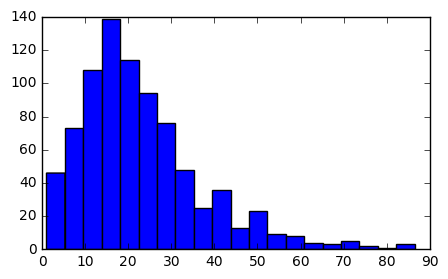

In [20]:
from matplotlib import pyplot as plt

order_values = pd.Series(pd.pivot_table(order_merge, index='OrderID', values='Quantity'))

fig, ax = plt.subplots(1,1, figsize = (5,3))
plt.hist(order_values, bins=20)
plt.show()

### 1)  Which employee had the highest total revenues?  Plot a bar chart to show this.

In [21]:
order_merge["Tot_Rev"] = order_merge["Quantity"]*order_merge["UnitPrice"]

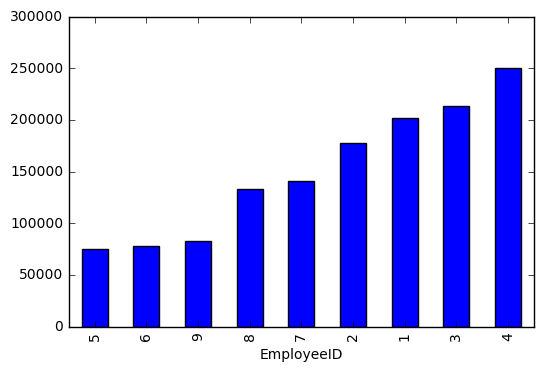

In [27]:
Tot_Rev = pd.pivot_table(order_merge, index="EmployeeID", values="Tot_Rev", aggfunc=sum).sort_values()
Tot_Rev.plot(kind="bar")
plt.show()

In [25]:
# Looks like Employee #4 is a hard worker.

### Challenge: create a scatter plot of unit price / quantity and colour-code by employee

### 2) Calculate and plot the total volume of products shipped by month

In [26]:
import datetime
order_merge["ShippedMonth"] = order_merge["ShippedDate"].apply(pd.to_datetime)
order_merge["ShippedMonth"] = order_merge["ShippedMonth"].apply(lambda x: x.month)

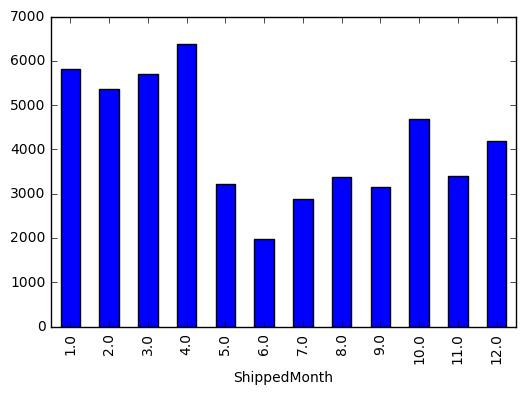

In [31]:
Monthly_ship = pd.pivot_table(order_merge, index="ShippedMonth", values="Quantity", aggfunc=sum)
Monthly_ship.plot(kind="bar")
plt.show()

### 3) Calculate and plot a histogram of the number of days taken to ship

In [36]:
order_merge["OrderDate"] = order_merge["OrderDate"].apply(pd.to_datetime)
order_merge["ShippedDate"] = order_merge["ShippedDate"].apply(pd.to_datetime)

order_merge["Ship_Length"] = (order_merge["ShippedDate"] - order_merge["OrderDate"]).dt.days


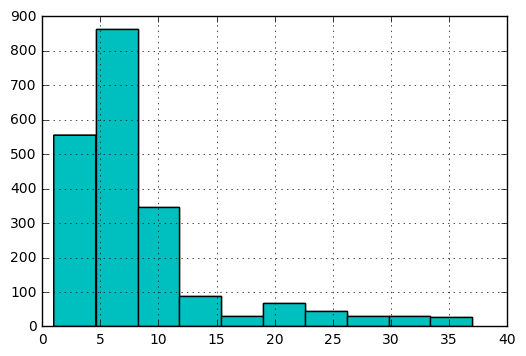

In [38]:
order_merge["Ship_Length"].hist()
plt.show()

### Challenge: compare the distributions for USA and UK on one plot

### 4) Plot the daily revenues over time (by Order Date)

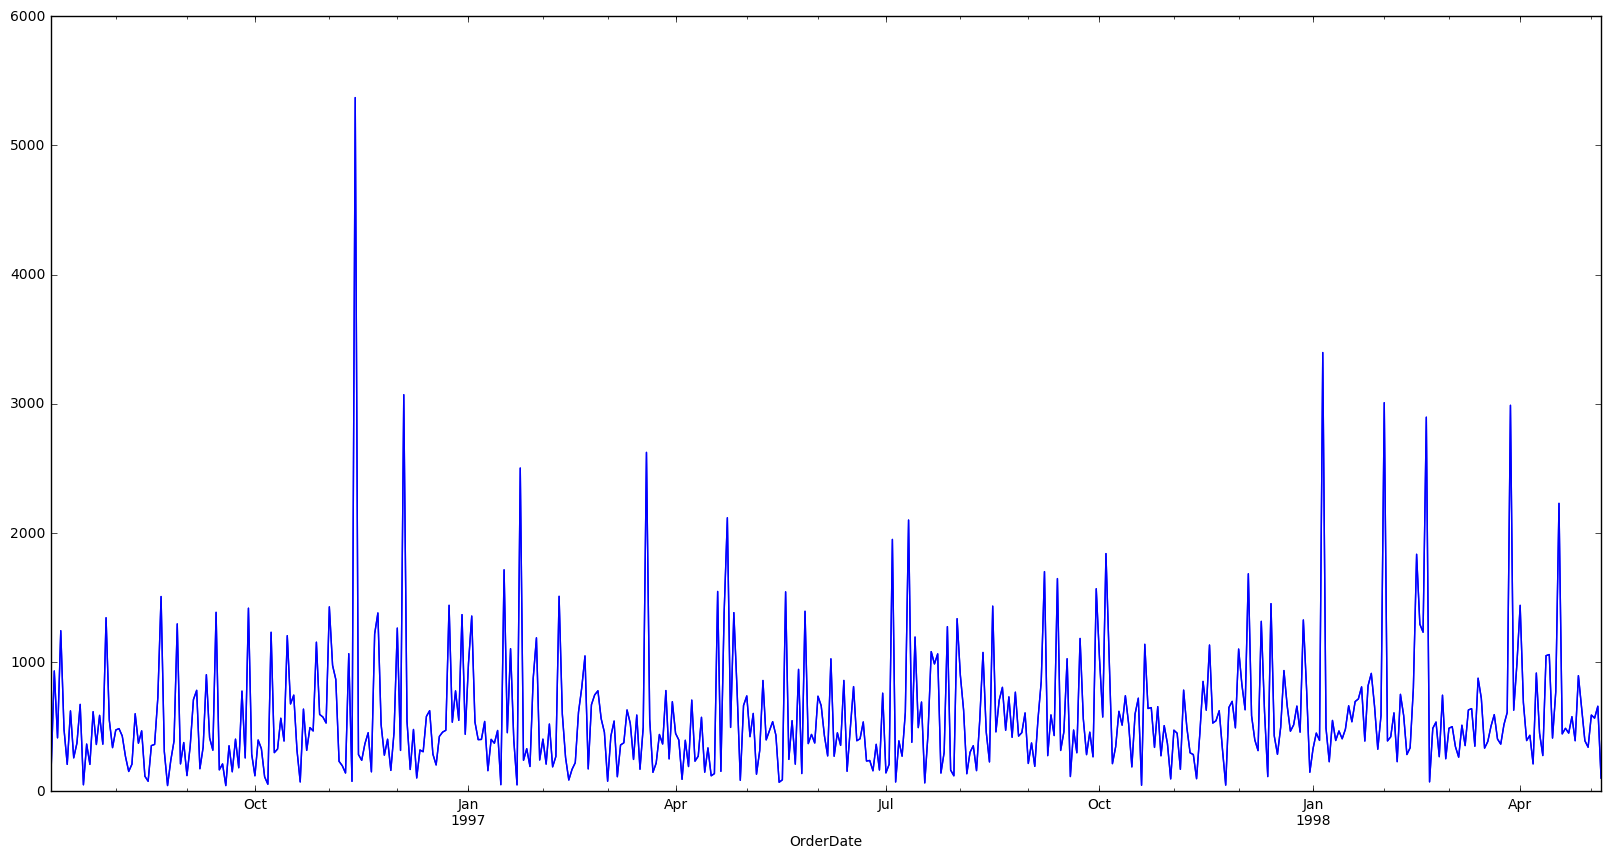

In [40]:
Rev_Time = pd.pivot_table(order_merge,index="OrderDate", values="Tot_Rev")
Rev_Time.plot(figsize=(20,10), c='b')
plt.show()